In [2]:
import numpy as np
import os
import cv2 
import matplotlib.pyplot as plt
import random

In [3]:
DIRECTORY = r'C:\Users\kk\Downloads\archive\dogscats\dogscats\train'

CATEGORIES = ['cat', 'dog']

In [4]:
data = []

for category in CATEGORIES:
    path = os.path.join(DIRECTORY, category)
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        label = CATEGORIES.index(category)
        arr = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        new_arr = cv2.resize(arr, (100, 100))
        data.append([new_arr, label])
        

In [5]:
len(data)

23000

In [6]:
random.shuffle(data)

In [7]:
data[1]

[array([[71, 68, 72, ..., 22, 22, 18],
        [95, 67, 55, ..., 18, 19, 15],
        [73, 60, 47, ..., 19, 17, 17],
        ...,
        [55, 56, 68, ..., 42, 41, 44],
        [48, 41, 35, ..., 41, 45, 48],
        [57, 44, 36, ..., 40, 46, 47]], dtype=uint8),
 1]

In [8]:
X = []
y = []

In [9]:
for features, label in data:
    X.append(features)
    y.append(label)

In [10]:
X = np.array(X)
y = np.array(y)

In [11]:
X=X/255

In [12]:
X.shape

(23000, 100, 100)

In [13]:
X = X.reshape(-1, 100, 100, 1)

In [16]:
X.shape

(23000, 100, 100, 1)

In [17]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten,Dropout

In [18]:
model = Sequential()

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dense(128, input_shape = X.shape[1:], activation = 'relu'))
model.add(Dropout(0.30))

model.add(Dense(2, activation = 'softmax'))

In [19]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
history = model.fit(X, y, epochs=5, validation_split=0.1)

Epoch 1/5
647/647 [==============================] - 178s 274ms/step - loss: 0.6265 - accuracy: 0.6364 - val_loss: 0.5349 - val_accuracy: 0.7304
Epoch 2/5
647/647 [==============================] - 199s 308ms/step - loss: 0.4820 - accuracy: 0.7711 - val_loss: 0.4608 - val_accuracy: 0.7874
Epoch 3/5
647/647 [==============================] - 201s 310ms/step - loss: 0.4108 - accuracy: 0.8097 - val_loss: 0.4208 - val_accuracy: 0.8109
Epoch 4/5
647/647 [==============================] - 200s 308ms/step - loss: 0.3471 - accuracy: 0.8476 - val_loss: 0.3601 - val_accuracy: 0.8478
Epoch 5/5
647/647 [==============================] - 198s 306ms/step - loss: 0.2941 - accuracy: 0.8740 - val_loss: 0.3679 - val_accuracy: 0.8370


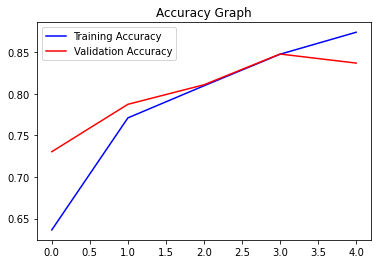

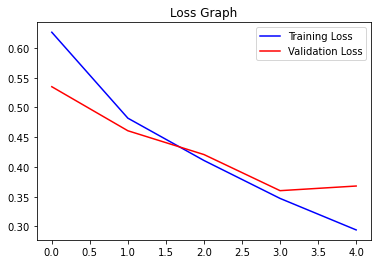

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()
 
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

In [22]:
def image(path):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    new_arr = cv2.resize(img, (100, 100))
    new_arr = np.array(new_arr)
    new_arr = new_arr.reshape(-1, 100, 100, 1)
    return new_arr

In [26]:
prediction = model.predict([image('C:/Users/kk/Desktop/img1.jpg')])
print(CATEGORIES[prediction.argmax()])

1/1 [==============================] - 0s 114ms/step
cat
